In [1]:
# BCG Python Project - Jonathan Jie

In [2]:
## Importing the necessary libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
## Importing movie dataset .dat
dfmovies = pd.read_csv(
    'C:/Users/Jonathan Jie/My Python Stuff/movies.dat',
    delimiter='::',
    header=None,
    names=['MovieID', 'Title', 'Genres'],
    engine='python',
    encoding='ISO-8859-1'
)

In [4]:
## Checking for proper import
dfmovies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
## Exploratory Data Analysis on dfmovies - Check for number of records in each column, data having null or not null, Data type
dfmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [6]:
## Exploratory Data Analysis - Check for Duplication

dfmovies.nunique()

MovieID    3883
Title      3883
Genres      301
dtype: int64

In [7]:
## Exploratory Data Analysis - Missing Values Calculation

dfmovies.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [8]:
## Exploratory Data Analysis - Duplicated Values Calculation

dfmovies.duplicated().sum()

0

In [9]:
##Importing ratings dataset
dfratings = pd.read_csv(
    'C:/Users/Jonathan Jie/My Python Stuff/ratings.dat',
    delimiter='::',
    header=None,
    names=['UserID', 'MovieID', 'Rating','Timestamp'],
    engine='python',
    encoding='ISO-8859-1'
)

In [10]:
## Same EDA Steps

dfratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [11]:
dfratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [12]:
dfratings.nunique()

UserID         6040
MovieID        3706
Rating            5
Timestamp    458455
dtype: int64

In [13]:
dfratings.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [14]:
dfratings.duplicated().sum()

0

In [15]:
##Importing users dataset
dfusers = pd.read_csv(
    'C:/Users/Jonathan Jie/My Python Stuff/users.dat',
    delimiter='::',
    header=None,
    names=['UserID', 'Gender', 'Age','Occupation','Zip-code'],
    engine='python',
    encoding='ISO-8859-1'
)

In [16]:
## Same EDA Steps

dfusers.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [17]:
dfusers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [18]:
dfusers.nunique()

UserID        6040
Gender           2
Age              7
Occupation      21
Zip-code      3439
dtype: int64

In [19]:
dfusers.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [20]:
## Each CSV seems clean so no further need for data cleaning.

## Time to move onto merging into a single Data Frame.

##First Merge on Movie ID
movie_ratings = pd.merge(dfmovies,dfratings,on = 'MovieID')

In [21]:
## Check if merge worked

movie_ratings

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,1,979852537


In [22]:
## Second merge to get Master_Data Data Frame
Master_Data = pd.merge(movie_ratings,dfusers, on = 'UserID')

In [23]:
## Check if merge worked

Master_Data

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


In [24]:
## Trim the Data frame 

Master_Data = Master_Data[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', 'Rating','Zip-code','Genres']]

In [25]:
## Check to see if zip-code has been dropped

Master_Data

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Zip-code,Genres
0,1,Toy Story (1995),1,1,F,10,5,48067,Animation|Children's|Comedy
1,48,Pocahontas (1995),1,1,F,10,5,48067,Animation|Children's|Musical|Romance
2,150,Apollo 13 (1995),1,1,F,10,5,48067,Drama
3,260,Star Wars: Episode IV - A New Hope (1977),1,1,F,10,4,48067,Action|Adventure|Fantasy|Sci-Fi
4,527,Schindler's List (1993),1,1,F,10,5,48067,Drama|War
...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),5727,25,M,4,4,92843,Drama|Thriller
1000205,3535,American Psycho (2000),5727,25,M,4,2,92843,Comedy|Horror|Thriller
1000206,3536,Keeping the Faith (2000),5727,25,M,4,5,92843,Comedy|Romance
1000207,3555,U-571 (2000),5727,25,M,4,3,92843,Action|Thriller


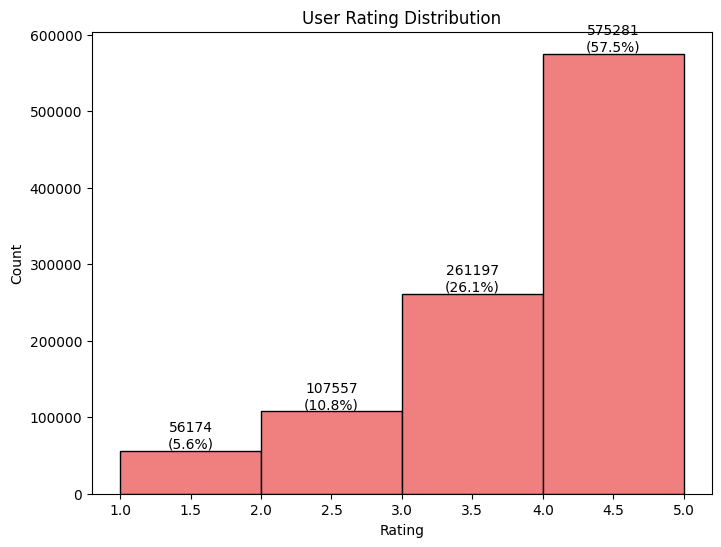

In [26]:
## Exploring the dataset - User Rating Distribution

# Plot the user rating distribution
ratings = Master_Data['Rating']

# Create the histogram with custom bin sizes
bin_edges = [1, 2, 3, 4, 5]
plt.figure(figsize=(8, 6))
hist, bins, _ = plt.hist(ratings, bins=bin_edges, color='lightcoral', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('User Rating Distribution')

# Calculate the percentage of each rating
total_ratings = len(ratings)
percentage = [(count / total_ratings) * 100 for count in hist]

# Calculate the midpoints of each bin
bin_midpoints = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins) - 1)]

# Annotate the bars with both count and percentage
for i, (count, percent) in enumerate(zip(hist, percentage)):
    plt.annotate(f'{int(count)}\n({percent:.1f}%)', xy=(bin_midpoints[i], count), ha='center', va='bottom')

plt.show()

In [27]:
'''
Comments on User Rating Distribution - 

Seems like our users are very positive with 57.5% of all ratings 4 or higher
'''

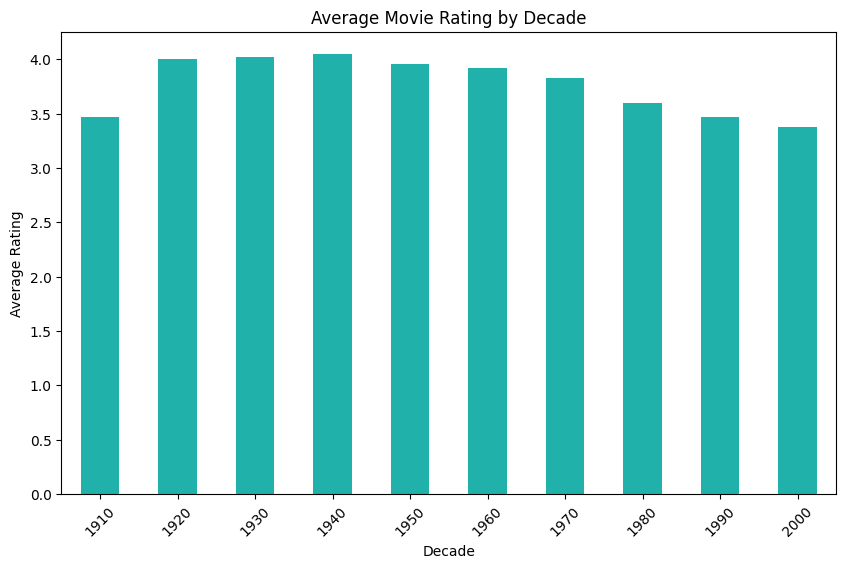

In [28]:
## Average Movie Rating by decade

## Extract the release year from the movie title
Master_Data['ReleaseYear'] = Master_Data['Title'].str.extract(r'\((\d{4})\)')

## Group movies by decade and calculate the average rating for each decade
decade_ratings = Master_Data.groupby(Master_Data['ReleaseYear'].str[:3] + '0')['Rating'].mean()

## Plot the average rating by decade
plt.figure(figsize=(10, 6))
decade_ratings.plot(kind='bar', color='lightseagreen')
plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating by Decade')
plt.xticks(rotation=45)
plt.show()

In [29]:
## There is not too much difference in ratings between the decades

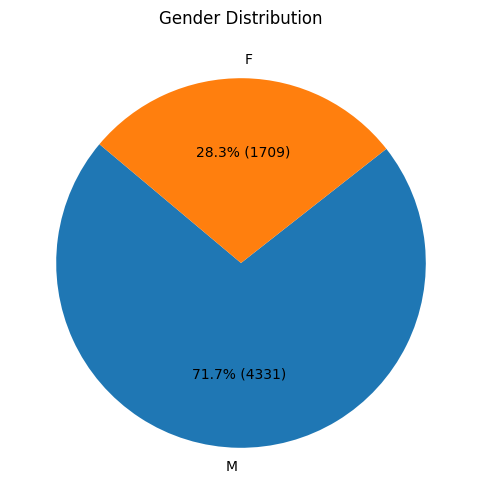

In [30]:
## Gender Distribution

gender_counts = dfusers['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct=lambda p:f'{p:.1f}% ({int(p*sum(gender_counts)/100)})', startangle=140)
plt.title("Gender Distribution")

## Remove the axis limits
plt.axis('off')

plt.show()

In [31]:
## The users are over 70% male which may cause some bias in ratings for movie categories

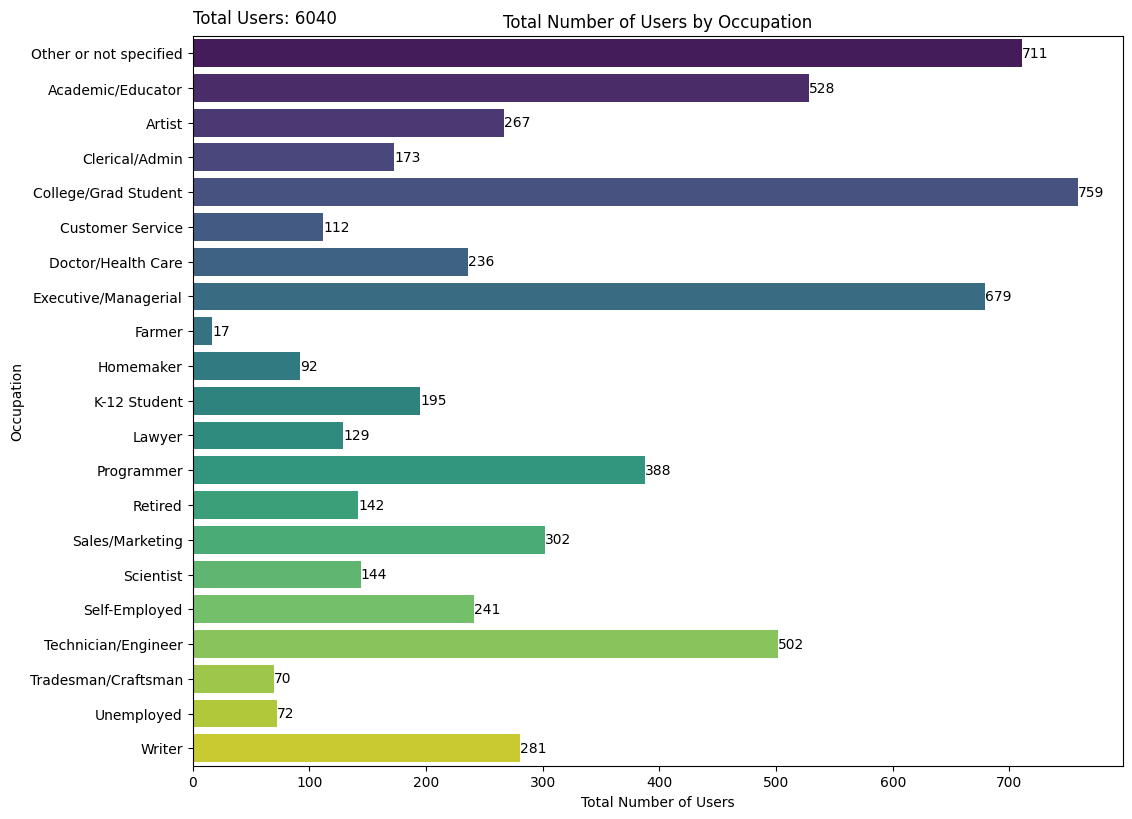

In [32]:
## Distribution of Users By Occupation

## Mapping of occupation codes to names
occupation_mapping = {
    0: "Other or not specified",
    1: "Academic/Educator",
    2: "Artist",
    3: "Clerical/Admin",
    4: "College/Grad Student",
    5: "Customer Service",
    6: "Doctor/Health Care",
    7: "Executive/Managerial",
    8: "Farmer",
    9: "Homemaker",
    10: "K-12 Student",
    11: "Lawyer",
    12: "Programmer",
    13: "Retired",
    14: "Sales/Marketing",
    15: "Scientist",
    16: "Self-Employed",
    17: "Technician/Engineer",
    18: "Tradesman/Craftsman",
    19: "Unemployed",
    20: "Writer"
}

## Count the unique number of users
total_users = dfusers['UserID'].nunique()

## Group by 'Occupation' and count the number of users in each category
occupation_counts = dfusers.groupby('Occupation')['UserID'].nunique().reset_index()

## Map the occupation codes to names
occupation_counts['Occupation'] = occupation_counts['Occupation'].map(occupation_mapping)

## Create a bar plot to show the total number of users by occupation
plt.figure(figsize=(12, 10))
ax = sns.barplot(data=occupation_counts, x='UserID', y='Occupation', palette='viridis')
plt.xlabel('Total Number of Users')
plt.ylabel('Occupation')
plt.title('Total Number of Users by Occupation')

## Add data labels for the user count on top of the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{int(width)}', va='center', ha='left')

## Add the total count of users as a label at the bottom
plt.text(0, -1, f'Total Users: {total_users}', va='center', ha='left', fontsize=12)

## Increase the bottom margin to make room for the labels
plt.subplots_adjust(bottom=0.15)

## Show the plot
plt.show()

In [33]:
## Job Distribution data is pretty varied and quite abit of non specific data.

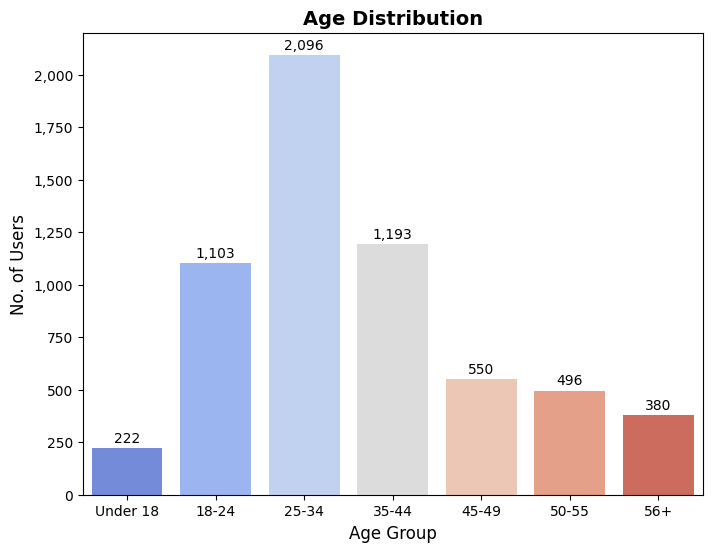

In [34]:
#Qn 1 (User Age Distribution)Histogram of Age Distribution in seaborn

from matplotlib.ticker import FuncFormatter

# Sample data (replace this with your actual "Master_Data" DataFrame)
# Age values from the "Master_Data" DataFrame
age_data = dfusers['Age']

# Create the countplot using Seaborn
fig, ax = plt.subplots(figsize=(8, 6))  # Use different variable names for fig and ax
age_dist = sns.countplot(
    data=dfusers,
    x='Age',
    palette='coolwarm',
    ax=ax  # Specify the axis for the plot
)
plt.title('Age Distribution', fontdict={'fontsize': 14, 'weight': 'bold'})
plt.xlabel('Age Group', fontdict={'fontsize': 12})
plt.ylabel('No. of Users', fontdict={'fontsize': 12})

## Define a function to format y-axis labels with thousands separators
def format_thousands(x, pos):
    return '{:,.0f}'.format(x)

## Apply the y-axis label formatting function
age_dist.yaxis.set_major_formatter(FuncFormatter(format_thousands))

## Define the x-axis tick positions and labels
x_positions = [0, 1, 2, 3, 4, 5, 6]
x_labels = ['Under 18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']

## Set the x-axis ticks and labels
plt.xticks(x_positions, x_labels)


## Add data labels to the bars
for container in age_dist.containers:
    age_dist.bar_label(container, padding=2, fmt='{:,.0f}')

plt.show()

In [35]:
'''
Comments on Age Distribution

Majority of users are within the 18-44 age group which could have an impact on ratings for certain genres 
which this age group prefers
'''

In [36]:
#Qn 2 (User rating of the movie “Toy Story”)

In [37]:
## Extracting just the data for Toy Story 1995 only. Not toy story 2

toy_story_ratings = Master_Data[Master_Data['Title'] == 'Toy Story (1995)']

In [38]:
## Finding the average rating for toy story

average_rating = toy_story_ratings['Rating'].mean()

In [39]:
average_rating

4.146846413095811

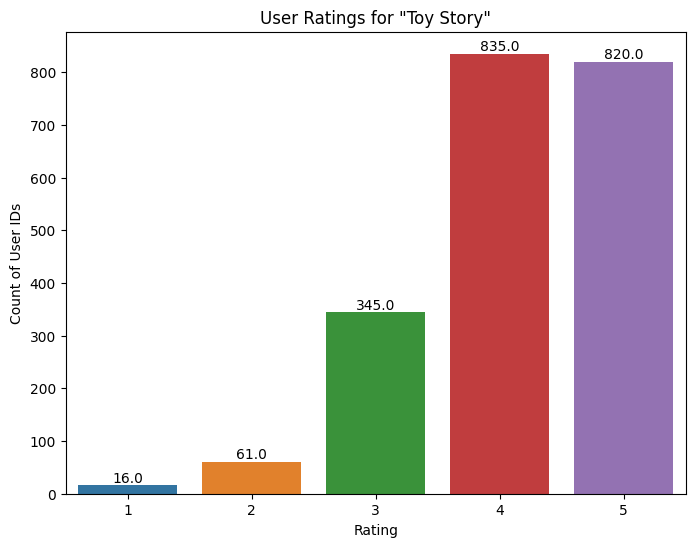

In [40]:
## Plotting the rating histrogram

plt.figure(figsize=(8, 6))
sns.countplot(data=toy_story_ratings, x='Rating')
plt.xlabel('Rating')
plt.ylabel('Count of User IDs')
plt.title('User Ratings for "Toy Story"')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


In [41]:
'''
Comments on Toy Story Ratings

There are 2,077 ratings for Toy Story with an overwhelming 79.6% of 
ratings either a 4 or 5 which means this movie is very highly liked.
'''

In [42]:
# Qn 3 Top 25 movies by viewership rating - method 1 by count of ratings i.e. how many people viewed it

In [43]:
rating_counts = Master_Data.groupby('Title')['Rating'].count()

In [44]:
top_25_views = rating_counts.sort_values(ascending=False).head(25)

In [45]:
print(top_25_views)

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

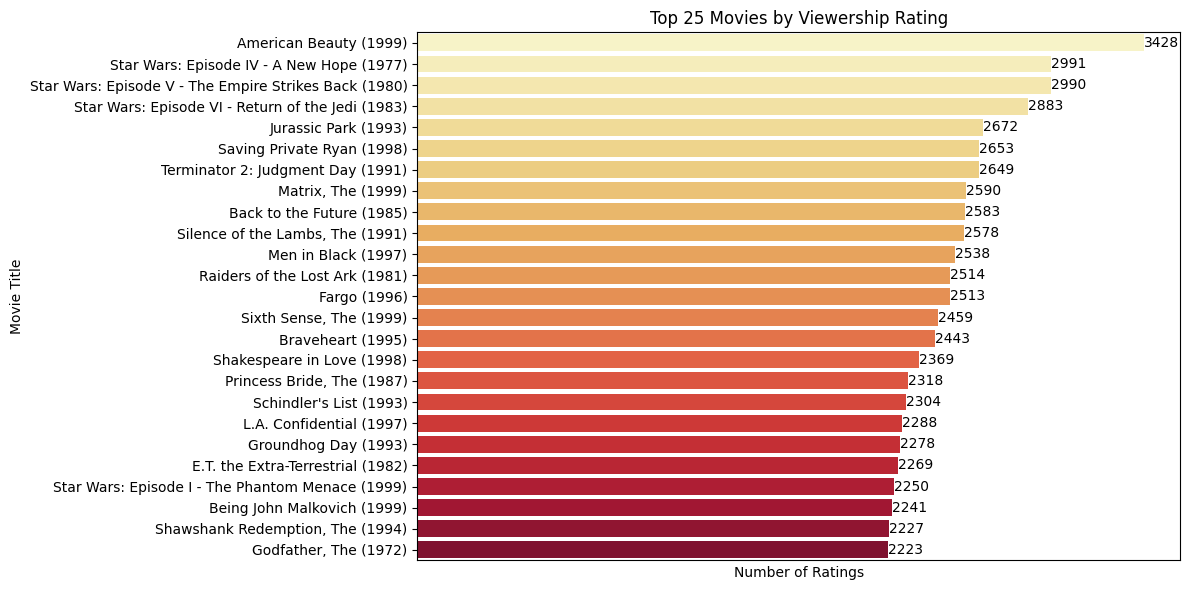

In [46]:
## Displaying data

plt.figure(figsize=(12, 6))  # Adjust the figure size for better visibility
ax = sns.barplot(
    x=top_25_views.values,  # Swap x and y for horizontal bars
    y=top_25_views.index,   # Swap x and y for horizontal bars
    palette=('YlOrRd')
)
plt.xlabel('Number of Ratings')  # Label the x-axis
plt.ylabel('Movie Title')        # Label the y-axis
plt.title('Top 25 Movies by Viewership Rating')

## Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.xticks([])  # Remove x-axis ticks since they are now labels
plt.tight_layout()               # Improve spacing and avoid cutoff labels
plt.show()

In [47]:
# Qn 3 Top 25 movies by viewership rating - method 2 Highest average rating

In [48]:
rating_average = Master_Data.groupby('Title')['Rating'].mean()


In [49]:
rating_average

Title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: Rating, Length: 3706, dtype: float64

In [50]:
top_25_average = rating_average.sort_values(ascending=False).head(25)

In [51]:
top_25_average

Title
Ulysses (Ulisse) (1954)                                                5.000000
Lured (1947)                                                           5.000000
Follow the Bitch (1998)                                                5.000000
Bittersweet Motel (2000)                                               5.000000
Song of Freedom (1936)                                                 5.000000
One Little Indian (1973)                                               5.000000
Smashing Time (1967)                                                   5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
Gate of Heavenly Peace, The (1995)                                     5.000000
Baby, The (1973)                                                       5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)           

C:\Users\Jonathan Jie\AppData\Local\Temp\ipykernel_20836\3184388766.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(top_25_average)


Text(0, 0.5, 'Density')

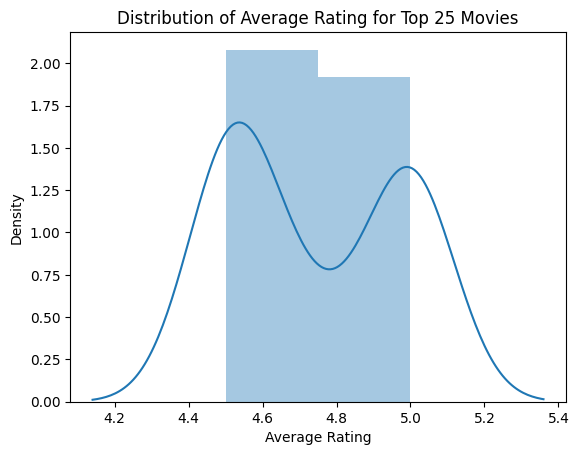

In [52]:
## Trying to use a distribution plot for the density of ratings.

sns.distplot(top_25_average)
plt.title('Distribution of Average Rating for Top 25 Movies')
plt.xlabel('Average Rating')
plt.ylabel('Density')

In [53]:
''' Qn 4 Find the ratings for all the movies reviewed by for a particular user of user id = 2696.
creating a new dataframe to extract all the data related to UserID 2696 '''

ratings_user_2696 = Master_Data[Master_Data['UserID'] == 2696]

In [54]:
## Taking a look at the movies the user has rated

ratings_user_2696_sorted = ratings_user_2696.sort_values(by='Rating', ascending=False)

In [55]:
ratings_user_2696_sorted

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Zip-code,Genres,ReleaseYear
991036,800,Lone Star (1996),2696,25,M,7,5,24210,Drama|Mystery,1996
991045,1645,"Devil's Advocate, The (1997)",2696,25,M,7,4,24210,Crime|Horror|Mystery|Thriller,1997
991047,1783,Palmetto (1998),2696,25,M,7,4,24210,Film-Noir|Mystery|Thriller,1998
991037,1092,Basic Instinct (1992),2696,25,M,7,4,24210,Mystery|Thriller,1992
991053,3176,"Talented Mr. Ripley, The (1999)",2696,25,M,7,4,24210,Drama|Mystery|Thriller,1999
991039,1258,"Shining, The (1980)",2696,25,M,7,4,24210,Horror,1980
991051,2389,Psycho (1998),2696,25,M,7,4,24210,Crime|Horror|Thriller,1998
991049,1892,"Perfect Murder, A (1998)",2696,25,M,7,4,24210,Mystery|Thriller,1998
991042,1617,L.A. Confidential (1997),2696,25,M,7,4,24210,Crime|Film-Noir|Mystery|Thriller,1997
991043,1625,"Game, The (1997)",2696,25,M,7,4,24210,Mystery|Thriller,1997


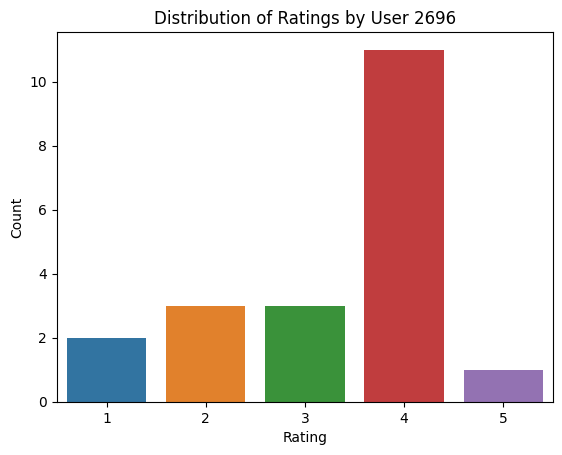

In [56]:
## Countplot of User 2696 Distribution of ratings given by the user.

sns.countplot(x='Rating', data=ratings_user_2696)
plt.title('Distribution of Ratings by User 2696')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

d:\Users\JonathanJie\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


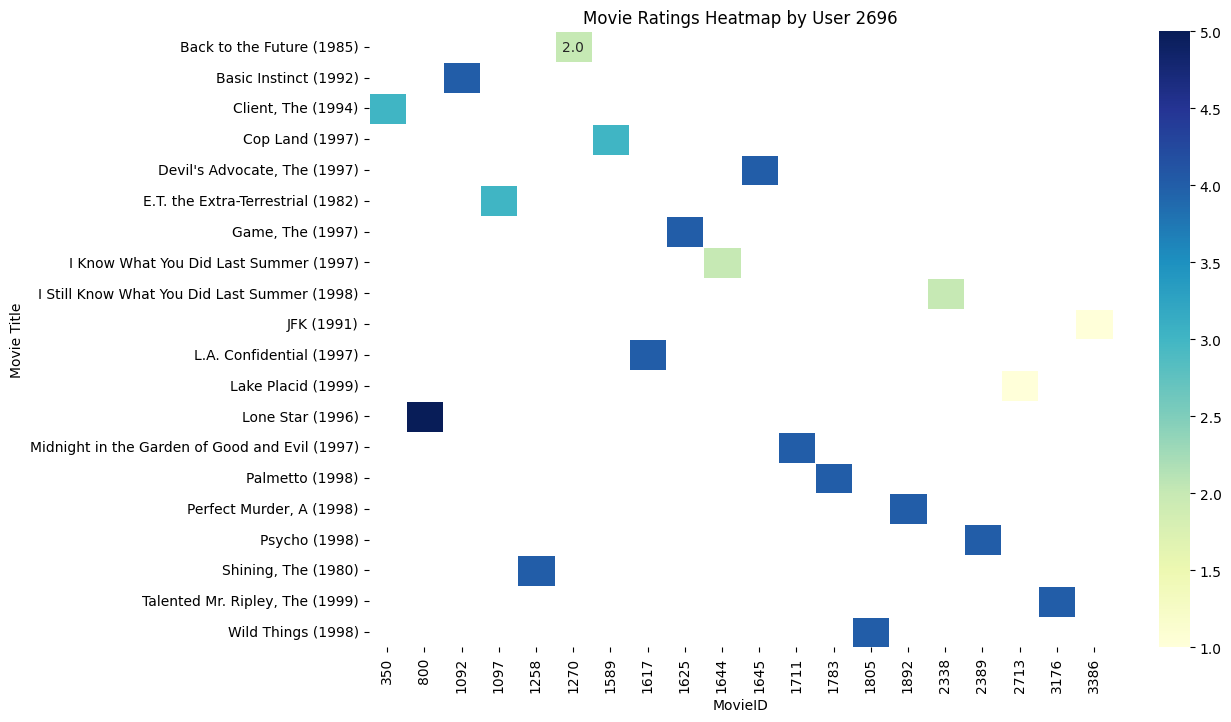

In [57]:
## plotting a heatmap of his ratings per movie arranged by movie title

heatmap_data = ratings_user_2696.pivot_table(index='Title', columns='MovieID', values='Rating')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Movie Ratings Heatmap by User 2696')
plt.xlabel('MovieID')
plt.ylabel('Movie Title')
plt.xticks(rotation=90)
plt.show()

d:\Users\JonathanJie\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


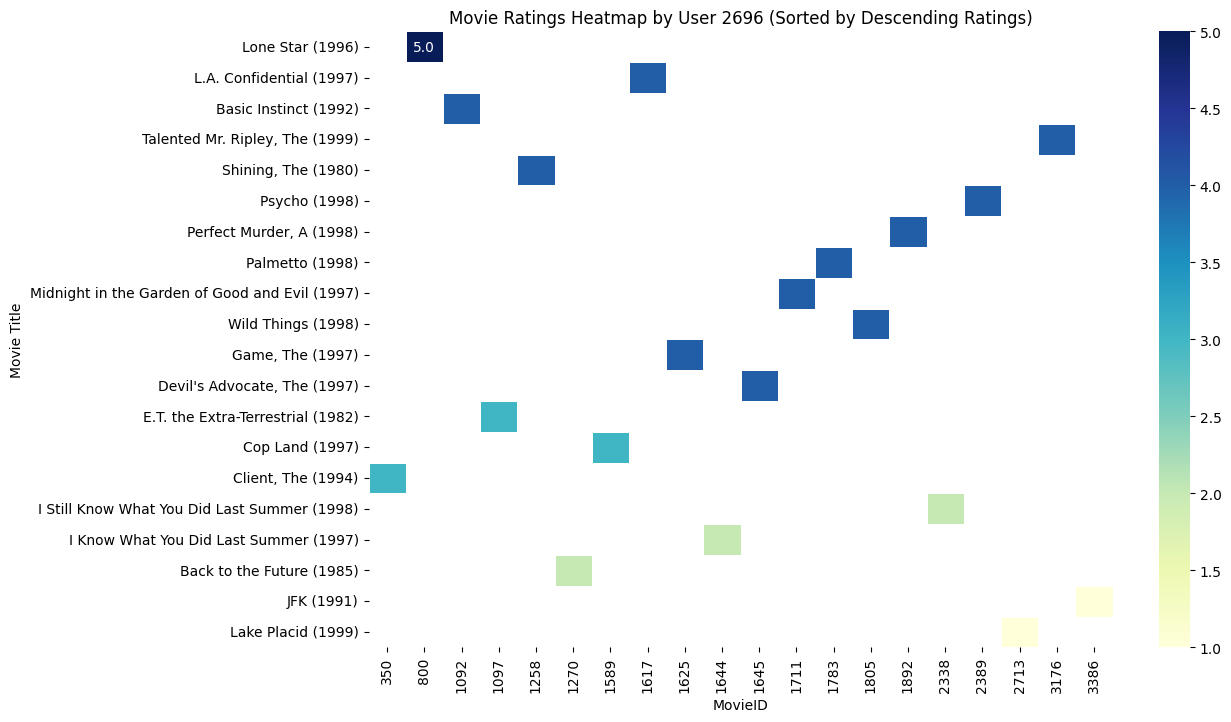

In [58]:
## Heatmap sorted by highest to lowest rating

average_ratings = ratings_user_2696.groupby('Title')['Rating'].mean().sort_values(ascending=False)
sorted_movie_titles = average_ratings.index

heatmap_data = ratings_user_2696.pivot_table(index='Title', columns='MovieID', values='Rating')
heatmap_data = heatmap_data.reindex(index=sorted_movie_titles)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Movie Ratings Heatmap by User 2696 (Sorted by Descending Ratings)')
plt.xlabel('MovieID')
plt.ylabel('Movie Title')
plt.xticks(rotation=90)
plt.show()

In [59]:
heatmap_data

MovieID,350,800,1092,1097,1258,1270,1589,1617,1625,1644,1645,1711,1783,1805,1892,2338,2389,2713,3176,3386
Title,,,,,,,,,,,,,,,,,,,,
Lone Star (1996),NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L.A. Confidential (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Basic Instinct (1992),NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Talented Mr. Ripley, The (1999)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
"Shining, The (1980)",NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Psycho (1998),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
"Perfect Murder, A (1998)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
Palmetto (1998),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Midnight in the Garden of Good and Evil (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
##Feature Engineering Qn 1. Find out all the unique genres 

# Split the 'Genres' column into a list of genres
Master_Data['Genre'] = Master_Data['Genres'].str.split('|')

# Flatten the list to get all unique genre values
all_genres = [genre for genres_list in Master_Data['Genre'] for genre in genres_list]

# Convert the unique genre values into a set to remove duplicates
unique_genres = set(all_genres)

# Convert the set back to a list if needed
unique_genres_list = list(unique_genres)

# Print or use unique_genres_list as needed
print(unique_genres_list)


['Animation', "Children's", 'Action', 'Thriller', 'Horror', 'Documentary', 'Fantasy', 'Western', 'Musical', 'Comedy', 'Adventure', 'Film-Noir', 'Crime', 'Mystery', 'Sci-Fi', 'Drama', 'War', 'Romance']


In [61]:
Master_Data

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Zip-code,Genres,ReleaseYear,Genre
0,1,Toy Story (1995),1,1,F,10,5,48067,Animation|Children's|Comedy,1995,"[Animation, Children's, Comedy]"
1,48,Pocahontas (1995),1,1,F,10,5,48067,Animation|Children's|Musical|Romance,1995,"[Animation, Children's, Musical, Romance]"
2,150,Apollo 13 (1995),1,1,F,10,5,48067,Drama,1995,[Drama]
3,260,Star Wars: Episode IV - A New Hope (1977),1,1,F,10,4,48067,Action|Adventure|Fantasy|Sci-Fi,1977,"[Action, Adventure, Fantasy, Sci-Fi]"
4,527,Schindler's List (1993),1,1,F,10,5,48067,Drama|War,1993,"[Drama, War]"
...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),5727,25,M,4,4,92843,Drama|Thriller,2000,"[Drama, Thriller]"
1000205,3535,American Psycho (2000),5727,25,M,4,2,92843,Comedy|Horror|Thriller,2000,"[Comedy, Horror, Thriller]"
1000206,3536,Keeping the Faith (2000),5727,25,M,4,5,92843,Comedy|Romance,2000,"[Comedy, Romance]"
1000207,3555,U-571 (2000),5727,25,M,4,3,92843,Action|Thriller,2000,"[Action, Thriller]"


In [62]:
# Dropped the 'Genre' column now
Master_Data.drop(['Genre'], axis=1, inplace=True)

In [63]:
Master_Data

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Zip-code,Genres,ReleaseYear
0,1,Toy Story (1995),1,1,F,10,5,48067,Animation|Children's|Comedy,1995
1,48,Pocahontas (1995),1,1,F,10,5,48067,Animation|Children's|Musical|Romance,1995
2,150,Apollo 13 (1995),1,1,F,10,5,48067,Drama,1995
3,260,Star Wars: Episode IV - A New Hope (1977),1,1,F,10,4,48067,Action|Adventure|Fantasy|Sci-Fi,1977
4,527,Schindler's List (1993),1,1,F,10,5,48067,Drama|War,1993
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),5727,25,M,4,4,92843,Drama|Thriller,2000
1000205,3535,American Psycho (2000),5727,25,M,4,2,92843,Comedy|Horror|Thriller,2000
1000206,3536,Keeping the Faith (2000),5727,25,M,4,5,92843,Comedy|Romance,2000
1000207,3555,U-571 (2000),5727,25,M,4,3,92843,Action|Thriller,2000


In [64]:
##one hot encoding
genres_encoded = Master_Data['Genres'].str.get_dummies('|')

Master_Data = pd.concat([Master_Data, genres_encoded], axis=1)

Master_Data.drop(columns=['Genres'], inplace=True)

In [65]:
Master_Data

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Zip-code,ReleaseYear,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1,1,F,10,5,48067,1995,0,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),1,1,F,10,5,48067,1995,0,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),1,1,F,10,5,48067,1995,0,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),1,1,F,10,4,48067,1977,1,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),1,1,F,10,5,48067,1993,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),5727,25,M,4,4,92843,2000,0,...,0,0,0,0,0,0,0,1,0,0
1000205,3535,American Psycho (2000),5727,25,M,4,2,92843,2000,0,...,0,0,1,0,0,0,0,1,0,0
1000206,3536,Keeping the Faith (2000),5727,25,M,4,5,92843,2000,0,...,0,0,0,0,0,1,0,0,0,0
1000207,3555,U-571 (2000),5727,25,M,4,3,92843,2000,1,...,0,0,0,0,0,0,0,1,0,0


In [66]:
## Running a Chi Square test
from scipy.stats import chi2_contingency

chi_square_results = pd.DataFrame(columns=['Variable', 'Chi-Square Statistic', 'P-Value'])


In [67]:
##Chi Square Test - For significant association or independence between them

chi_square_results_list = []

categorical_columns = ['MovieID','Title','UserID','Age','Gender', 'Occupation', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary',
                       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

ratings_column = 'Rating'

for column in categorical_columns:
    contingency_table = pd.crosstab(Master_Data[column], Master_Data[ratings_column])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Append the results as a dictionary to the list
    chi_square_results_list.append({'Variable': column, 'Chi-Square Statistic': chi2, 'P-Value': p})

# Create a DataFrame from the list
chi_square_results = pd.DataFrame(chi_square_results_list)

# Print the DataFrame with the results
print(chi_square_results)

       Variable  Chi-Square Statistic        P-Value
0       MovieID         334721.078537   0.000000e+00
1         Title         334721.078537   0.000000e+00
2        UserID         289349.748616   0.000000e+00
3           Age           5419.941571   0.000000e+00
4        Gender            455.860738   2.348561e-97
5    Occupation           5370.499190   0.000000e+00
6        Action           2335.748301   0.000000e+00
7     Adventure           1483.710505   0.000000e+00
8     Animation            458.717410   5.664801e-98
9    Children's           1720.372481   0.000000e+00
10       Comedy           1739.562594   0.000000e+00
11        Crime           1142.925144  3.755826e-246
12  Documentary            898.308498  3.873910e-193
13        Drama          15033.979340   0.000000e+00
14      Fantasy            609.770918  1.189834e-130
15    Film-Noir           3897.173196   0.000000e+00
16       Horror           9952.568681   0.000000e+00
17      Musical            279.320653   3.1222

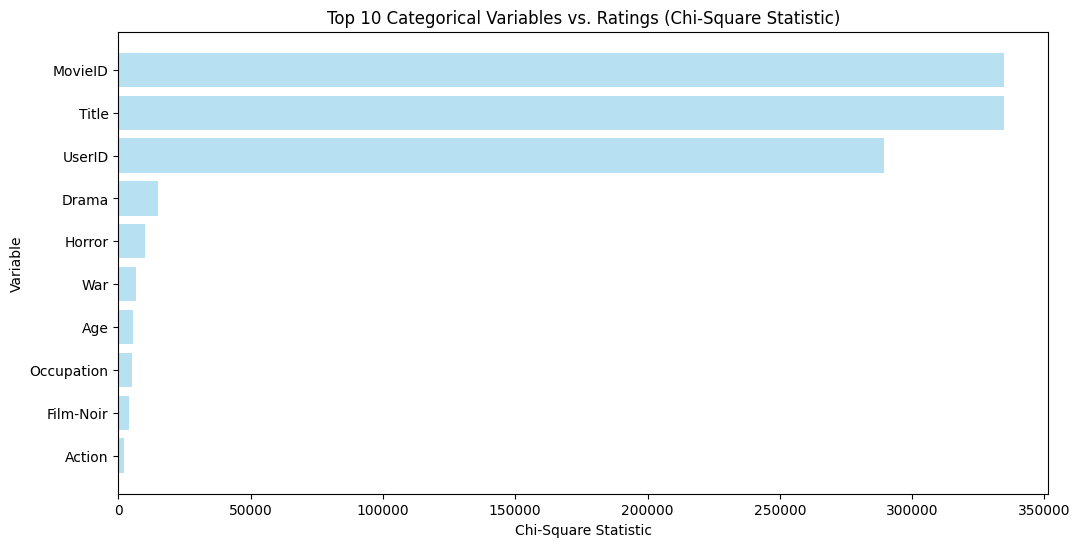

In [73]:
##Top 10 Categorical Variables vs Ratings. Exclude the log-10 ratings are they are too small

# Sort the chi-square results DataFrame by chi-square statistic in descending order
sorted_results = chi_square_results.sort_values(by='Chi-Square Statistic', ascending=False)

# Define the number of top variables to display (you can adjust this as needed)
top_n = 10

# Select the top variables based on chi-square statistic
top_results = sorted_results.iloc[:top_n]

# Create a bar chart to visualize chi-square statistic
plt.figure(figsize=(12, 6))
plt.barh(top_results['Variable'], top_results['Chi-Square Statistic'], color='skyblue', alpha=0.6)
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Variable')
plt.gca().invert_yaxis()
plt.title(f'Top {top_n} Categorical Variables vs. Ratings (Chi-Square Statistic)')
plt.show()

In [ ]:
'''
Overall based on the results of the Chi Square test. Most categorical variables are significantly associated with Rating with 
MovieID, Title,UserID,Drama,Horror,War,Age,Occupation,Film-Noir,Action being the highest. 
'''

In [75]:
##Spearman test - Assess the strength and direction of the ordinal or continuous variables monotonic relationship

spearman_data = Master_Data[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation','Rating', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]

In [84]:
import scipy.stats as stats 

# Create your spearman_data DataFrame here (contains the variables you want to analyze)

correlation_coeffs = []
p_values = []
variable1_list = []
variable2_list = []

for column1 in spearman_data.columns:
    for column2 in spearman_data.columns:
        if column1 != column2:
            # Calculate Spearman correlation and p-value
            rho, p_value = stats.spearmanr(spearman_data[column1], spearman_data[column2])
            correlation_coeffs.append(rho)
            p_values.append(p_value)
            variable1_list.append(column1)
            variable2_list.append(column2)

# Create a DataFrame to store the results
spearman_results = pd.DataFrame({
    'Variable 1': variable1_list,
    'Variable 2': variable2_list,
    'Spearman Coefficient': correlation_coeffs,
    'P-Value': p_values
})

# Print or use spearman_results as needed
print(spearman_results)

    Variable 1  Variable 2  Spearman Coefficient        P-Value
0      MovieID       Title             -0.015235   2.004310e-52
1      MovieID      UserID             -0.016358   3.639355e-60
2      MovieID         Age              0.028062  2.272528e-173
3      MovieID      Gender              0.022176  5.236478e-109
4      MovieID  Occupation              0.009242   2.393456e-20
..         ...         ...                   ...            ...
595    Western     Mystery             -0.029727  2.585435e-194
596    Western     Romance             -0.044650   0.000000e+00
597    Western      Sci-Fi             -0.010935   7.693598e-28
598    Western    Thriller             -0.058897   0.000000e+00
599    Western         War             -0.019803   2.616260e-87

[600 rows x 4 columns]


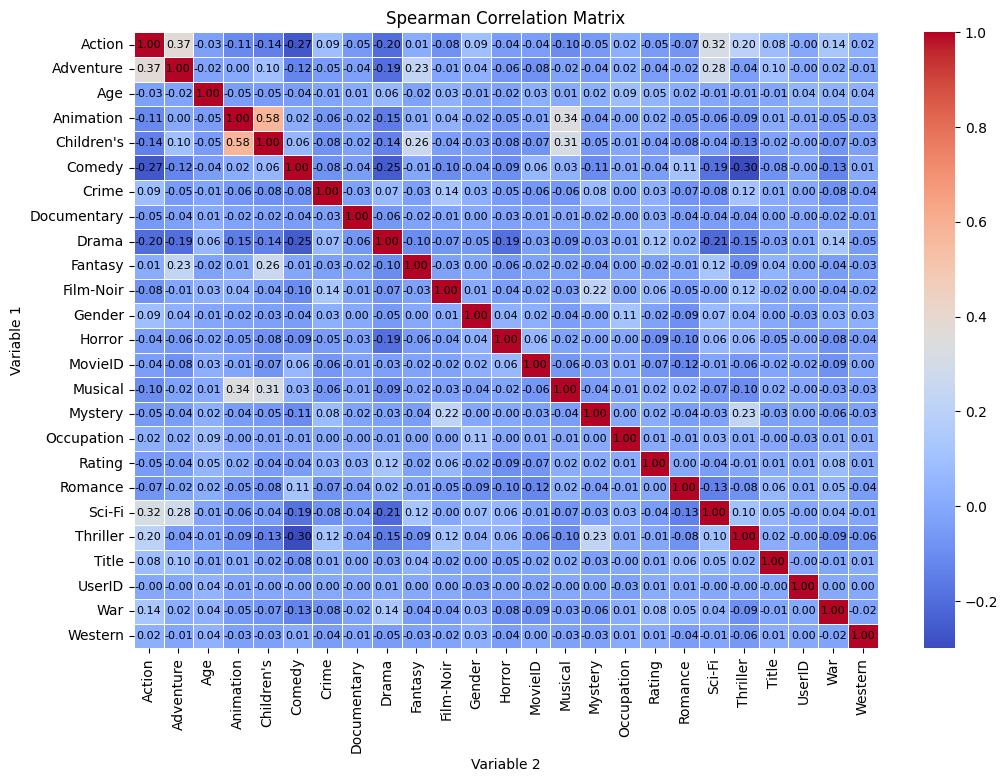

In [110]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a heatmap of the correlation matrix with custom annotations
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', fontsize=8)

# Create the heatmap with a color bar
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, cbar=True, linewidths=0.5)

# Customize the plot (optional)
plt.title('Spearman Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()

In [ ]:
'''
Overall, these correlations suggest that user age, certain movie genres (e.g., drama and film-noir), 
and possibly user occupation have some influence on user ratings. 
However, the correlations are generally weak to moderate, 
indicating that these factors alone may not explain a significant portion of the variance in ratings. 
'''